# Bitcoin DCA strategies comparison

1. is there any dca strategy which overperforms the others?
2. is there anything else that can be done on top of the dca?

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'/Users/alinemartinscs/projects/btc-dca'

In [23]:
data = pd.DataFrame(pd.read_csv("btcdata.csv", sep='\t'))
data.columns

Index(['Time', 'BTC / USD Denominated Closing Price',
       'BTC / MVRV (Market Cap / Realized Market Cap)',
       'BTC / 30 Day Volatility', 'BTC / 180 Day Volatility'],
      dtype='object')

In [26]:
data.Time = pd.to_datetime(data.Time)
data.rename(columns={'BTC / USD Denominated Closing Price': 'price_usd'}, inplace=True)
data.rename(columns={'BTC / MVRV (Market Cap / Realized Market Cap)': 'ratio_mktcap_realizedmktcap'}, inplace=True)
data.rename(columns={'BTC / 30 Day Volatility': '30_day_volatility'}, inplace=True)
data.rename(columns={'BTC / 180 Day Volatility': '180_day_volatility'}, inplace=True)
data.columns

Index(['Time', 'price_usd', 'ratio_mktcap_realizedmktcap', '30_day_volatility',
       '180_day_volatility'],
      dtype='object')

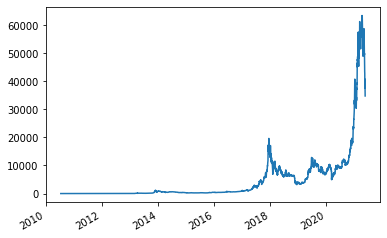

In [124]:
# plot btc usd price
df = pd.DataFrame()
df['value'] = data.price_usd
df = df.set_index(data.Time)
plt.plot(df)
plt.gcf().autofmt_xdate()
plt.show()

In [263]:
# DCA setup constants
#start_date = data.Time[2]

strategy_results = {}
strategy_results['out_metrics'] = []
strategy_results['data'] = []
#start_date = pd.to_datetime('2018-01-01')
purchase_freq_days = 30
yearly_contribution_usd = 1000
buy_contr = yearly_contribution_usd / 365 * purchase_freq_days

for i in data['Time'].index:
    out_metrics[i] = executeDCA(data, data['Time'].iat(i), purchase_freq_days, buy_contr)

#plotGains(data, out_metrics['total_days'])




# SHOW METRICS
out_metrics
#data.gains_perc

TypeError: '_iAtIndexer' object is not callable

In [246]:
def plotGains(data, total_days):
    # PLOT
    fig, (ax1, ax2) = plt.subplots(2)

    df1 = pd.DataFrame()
    df1['price_usd'] = data.price_usd
    df1['accum_invested_usd'] = data.accum_invested_usd
    df1['portfolio_value_usd'] = data.portfolio_value_usd
    df1 = df1.set_index(data.Time)
    ax1.plot(df1.tail(total_days))
    ax1.set_title('Values')
    ax1.set(ylabel='USD')

    df2 = pd.DataFrame()
    df2['gains_perc'] = data.gains_perc
    df2 = df2.set_index(data.Time)
    ax2.plot(df2.tail(total_days))
    ax2.set_title('Gains')
    ax2.set(ylabel='Percentage (%)')

    plt.gcf().autofmt_xdate()
    plt.show()

In [261]:
def executeDCA(data, start_date, purchase_freq_days, buy_contr):
    
    #dca_active mask tells the period in which the strategy is being executed
    data['dca_active'] = data['Time'] >= start_date

    #dca_days - how many days the strategy is being executed
    dca_days = np.zeros(data.shape[0])
    for i, row in data.iterrows():
        if row.dca_active:
            dca_days[i] = dca_days[i-1] + 1
    data['dca_days'] = dca_days

    # a trigger indicating buy moments
    data['dca_buy_trigger'] = data['dca_active'] & (data['dca_days'] % purchase_freq_days == 0)

    # calculate accums
    purchase_btc = np.zeros(data.shape[0])
    accum_invested_usd = np.zeros(data.shape[0])
    accum_btc = np.zeros(data.shape[0])
    portfolio_value_usd = np.zeros(data.shape[0])
    gains_perc = np.zeros(data.shape[0])
    for i, row in data.iterrows():
        if row.dca_buy_trigger:
            purchase_btc[i] = buy_contr / row.price_usd
            accum_invested_usd[i] = accum_invested_usd[i-1] + buy_contr
            accum_btc[i] = accum_btc[i-1] + purchase_btc[i]
        else:
            accum_invested_usd[i] = accum_invested_usd[i-1] 
            accum_btc[i] = accum_btc[i-1]

        portfolio_value_usd[i] = row.price_usd * accum_btc[i]
        #gains_perc[i] = portfolio_value_usd[i] / accum_invested_usd[i]
    data['purchase_btc'] = purchase_btc
    data['accum_invested_usd'] = accum_invested_usd
    data['accum_btc'] = accum_btc
    data['portfolio_value_usd'] = portfolio_value_usd
    data['gains_perc'] = portfolio_value_usd / accum_invested_usd * 100

    out_metrics = {}
    out_metrics['total_days'] = int(data.dca_days.tail(1))
    out_metrics['total_invested_usd'] = float(data.accum_invested_usd.tail(1))
    out_metrics['net_worth'] = float(data.portfolio_value_usd.tail(1))
    out_metrics['gains_perc'] = float(data.gains_perc.tail(1))
    #out_metrics = pd.DataFrame(out_metrics)
    
    
    return out_metrics


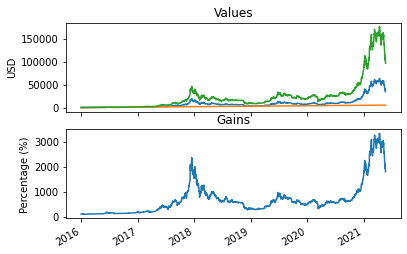

In [171]:
out_metrics['total_days']

1970